# Hourly Cab Booking Prediction Analysis

Assignment : To predict the total count of cabs booked in each hour using ML.

Data points: datetime, season, holiday, workingday, weather, temp, humidity, windspeed, Total_booking. 
Output/Dependent variables:  Total_booking.

In [1]:
# Installing required libraries

In [2]:
pip install pandas-profiling

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires joblib==1.0.0, but you have joblib 1.0.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lazypredict

  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import pandas_profiling as pf

#Required imports
import time, datetime

#Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import LabelEncoder

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neural_network import MLPRegressor

#Importing lazyPredict library for quick estimation of Generating the model
from lazypredict.Supervised import LazyRegressor

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
#Loading dataset
data = pd.read_csv("Final_data_Updated_data.csv", header=0)
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,77,17.00,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.7,79,19.00,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,50,22.00,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,29,9.00,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,51,19.00,184


In [7]:
#Creating an original copy of the data for backup
data_backup = data.copy()
data_backup.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,77,17.00,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.7,79,19.00,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,50,22.00,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,29,9.00,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,51,19.00,184


# Task 1: Data Analysis

In [8]:
# Creating Profile Report of the Dataset - Missing values, Outlier, Correlation can be easily interpreted

In [9]:
#Generating the Profile Report of the dataset - Easiest way to get the insights of the Data
import pandas_profiling as pf
profile = pf.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Get the Descriptive Stats about the Numeric data along with the categorical feature
data.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings
count,8708,8708,8708.00,8708.00,8708,8705,8708.00,8708.00,8708.00
unique,8708,7,nan,nan,4,55,nan,nan,nan
top,3/6/2011 4:00,Summer,nan,nan,Clear + Few clouds,14.76,nan,nan,nan
freq,1,2191,nan,nan,5753,361,nan,nan,nan
mean,NaN,NaN,0.03,0.68,NaN,NaN,61.65,12.84,193.01
std,NaN,NaN,0.17,0.47,NaN,NaN,19.20,8.19,181.55
min,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,1.00
25%,NaN,NaN,0.00,0.00,NaN,NaN,46.00,7.00,43.00
50%,NaN,NaN,0.00,1.00,NaN,NaN,61.00,13.00,148.00
75%,NaN,NaN,0.00,1.00,NaN,NaN,77.00,17.00,286.00


In [11]:
#Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   temp                      8705 non-null   object 
 6   humidity                  8708 non-null   int64  
 7   windspeed                 8708 non-null   float64
 8   total number of bookings  8708 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 612.4+ KB


In [12]:
# Finding Duplicate rows
duplicate_rows = data[data.duplicated(keep="first")]
duplicate_rows

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings


In [13]:
#Get data types
data.dtypes

datetime                     object
season                       object
holiday                       int64
workingday                    int64
weather                      object
temp                         object
humidity                      int64
windspeed                   float64
total number of bookings      int64
dtype: object

In [14]:
#Converting object to float for temp column
data['temp'] = pd.to_numeric(data['temp'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   temp                      8701 non-null   float64
 6   humidity                  8708 non-null   int64  
 7   windspeed                 8708 non-null   float64
 8   total number of bookings  8708 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 612.4+ KB


In [15]:
# Identifying Missing Values

In [16]:
#Checking missing values
data.isnull().sum()

datetime                    0
season                      0
holiday                     0
workingday                  0
weather                     0
temp                        7
humidity                    0
windspeed                   0
total number of bookings    0
dtype: int64

In [17]:
# By looking at the info, we can say that there are 7 missing values for temp column

In [18]:
#looking at the missing values of the Temp column
data[data.temp.isnull()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings
60,7/16/2011 18:00,Fall,0,0,Clear + Few clouds,nan,45,19.00,428
172,12/9/2012 17:00,Winter,0,0,"Light Snow, Light Rain",nan,93,9.00,229
269,11/19/2011 5:00,Winter,0,0,Clear + Few clouds,nan,56,17.00,2
339,9/1/2011 15:00,Fall,0,1,Clear + Few clouds,nan,51,9.00,174
406,8/7/2011 12:00,Fall,0,0,Clear + Few clouds,nan,42,20.00,370
561,1/1/2012 16:00,Spring,0,0,Mist + Cloudy,nan,54,20.00,215
644,4/7/2011 2:00,Summer,0,1,Clear + Few clouds,nan,54,0.00,7


In [19]:
#Calculating Median for temp column and filling it
med = data.temp.median()
med

20.5

In [20]:
# Imputing Median
data['temp_median']= data.temp.fillna(med)
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings,temp_median
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,77,17.00,504,22.14
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,79,19.00,5,28.70
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,50,22.00,139,5.74
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,29,9.00,209,13.94
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,51,19.00,184,30.34


In [21]:
#looking at the missing values of the Temp column with imputed temp_median column
data[data.temp.isnull()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings,temp_median
60,7/16/2011 18:00,Fall,0,0,Clear + Few clouds,nan,45,19.00,428,20.50
172,12/9/2012 17:00,Winter,0,0,"Light Snow, Light Rain",nan,93,9.00,229,20.50
269,11/19/2011 5:00,Winter,0,0,Clear + Few clouds,nan,56,17.00,2,20.50
339,9/1/2011 15:00,Fall,0,1,Clear + Few clouds,nan,51,9.00,174,20.50
406,8/7/2011 12:00,Fall,0,0,Clear + Few clouds,nan,42,20.00,370,20.50
561,1/1/2012 16:00,Spring,0,0,Mist + Cloudy,nan,54,20.00,215,20.50
644,4/7/2011 2:00,Summer,0,1,Clear + Few clouds,nan,54,0.00,7,20.50


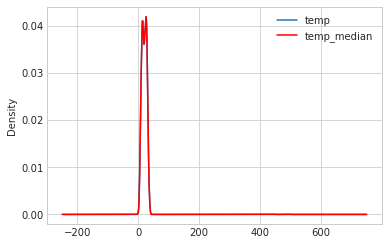

In [22]:
#Building KDE distributions to check about the distributions after imputing the missing values
fig = plt.figure()
ax = fig.add_subplot(111)
data['temp'].plot(kind='kde', ax=ax)
data.temp_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [23]:
# As both the graphs are inseparable, we can say that the data has been imputed properly

In [24]:
#Dropping the temp column
data.drop('temp', inplace=True, axis=1)
data.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,77,17.00,504,22.14
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,79,19.00,5,28.70
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,50,22.00,139,5.74
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,29,9.00,209,13.94
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,51,19.00,184,30.34


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   humidity                  8708 non-null   int64  
 6   windspeed                 8708 non-null   float64
 7   total number of bookings  8708 non-null   int64  
 8   temp_median               8708 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 612.4+ KB


In [26]:
data.describe(include='all')

,datetime,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median
count,8708,8708,8708.00,8708.00,8708,8708.00,8708.00,8708.00,8708.00
unique,8708,7,nan,nan,4,nan,nan,nan,nan
top,3/6/2011 4:00,Summer,nan,nan,Clear + Few clouds,nan,nan,nan,nan
freq,1,2191,nan,nan,5753,nan,nan,nan,nan
mean,NaN,NaN,0.03,0.68,NaN,61.65,12.84,193.01,20.34
std,NaN,NaN,0.17,0.47,NaN,19.20,8.19,181.55,10.42
min,NaN,NaN,0.00,0.00,NaN,0.00,0.00,1.00,0.82
25%,NaN,NaN,0.00,0.00,NaN,46.00,7.00,43.00,13.94
50%,NaN,NaN,0.00,1.00,NaN,61.00,13.00,148.00,20.50
75%,NaN,NaN,0.00,1.00,NaN,77.00,17.00,286.00,26.24


In [27]:
#As datetime is an object time, coverting it into multiple columns
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data['time'] = data['datetime'].dt.time
data.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median,date,time
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,77,17.00,504,22.14,2012-05-02,19:00:00
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,79,19.00,5,28.70,2012-09-05,04:00:00
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,50,22.00,139,5.74,2011-01-13,09:00:00
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,29,9.00,209,13.94,2011-11-18,16:00:00
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,51,19.00,184,30.34,2011-09-13,13:00:00


In [28]:
#Dropping Datetime column
data.drop('datetime', inplace=True, axis=1)
data.head()

,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median,date,time
0,Summer,0,1,Clear + Few clouds,77,17.00,504,22.14,2012-05-02,19:00:00
1,Fall,0,1,Clear + Few clouds,79,19.00,5,28.70,2012-09-05,04:00:00
2,Spring,0,1,Clear + Few clouds,50,22.00,139,5.74,2011-01-13,09:00:00
3,Winter,0,1,Clear + Few clouds,29,9.00,209,13.94,2011-11-18,16:00:00
4,Fall,0,1,Clear + Few clouds,51,19.00,184,30.34,2011-09-13,13:00:00


In [29]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'humidity', 'windspeed',
       'total number of bookings', 'temp_median', 'date', 'time'],
      dtype='object')

<AxesSubplot:xlabel='season', ylabel='count'>

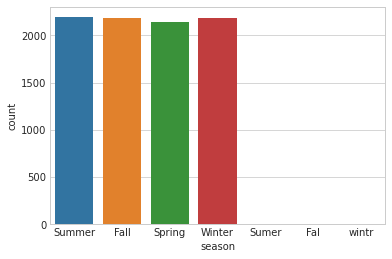

In [30]:
# Visualizing Season column
sns.countplot(data.season)

In [31]:
#Going through the season column data
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter', 'Sumer', 'Fal', 'wintr'],
      dtype=object)

In [32]:
# As there are some data which have corrupted names, replacing them with the correct names
data = data.replace(to_replace ="Sumer",value ="Summer")
data = data.replace(to_replace ="Fal",value ="Fall")
data = data.replace(to_replace ="wintr",value ="Winter")
# Season column
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

<AxesSubplot:xlabel='season', ylabel='count'>

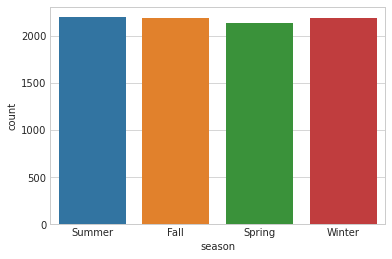

In [33]:
# Visualizing Season column
sns.countplot(data.season)

<AxesSubplot:xlabel='holiday', ylabel='count'>

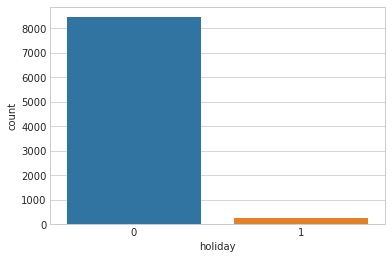

In [34]:
sns.countplot(data.holiday)

<AxesSubplot:xlabel='workingday', ylabel='count'>

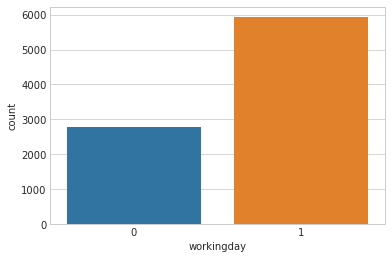

In [35]:
sns.countplot(data.workingday)

<AxesSubplot:xlabel='weather', ylabel='count'>

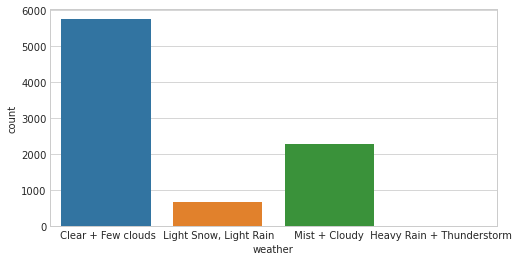

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(data.weather)

<AxesSubplot:xlabel='humidity', ylabel='count'>

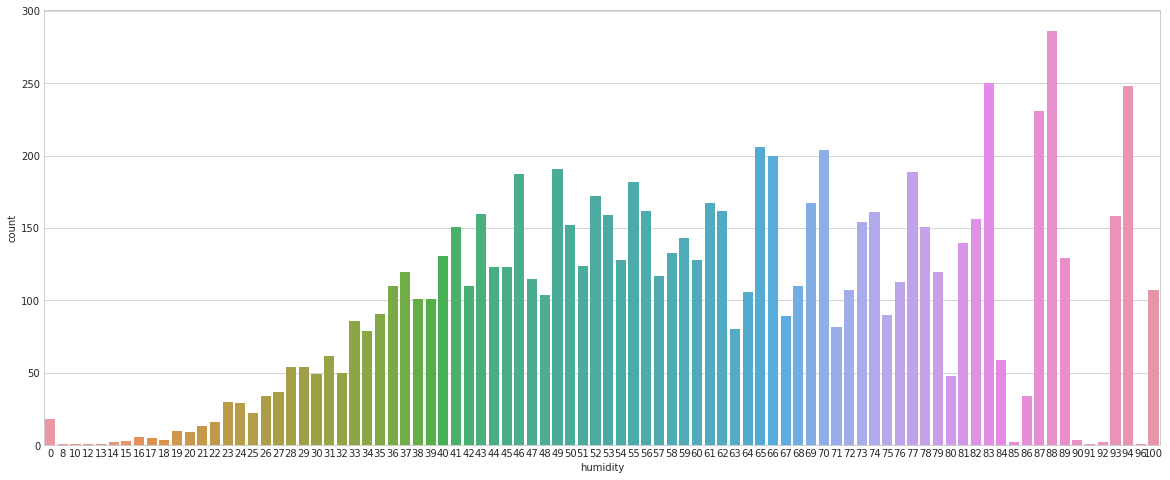

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data.humidity)

<AxesSubplot:xlabel='total number of bookings', ylabel='Density'>

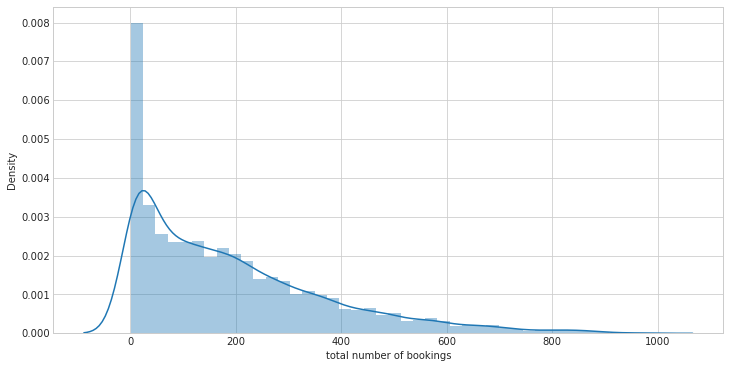

In [38]:
#For Target variable
plt.figure(figsize=(12,6))
sns.distplot(data['total number of bookings'])

In [39]:
data.describe(include="all")

,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median,date,time
count,8708,8708.00,8708.00,8708,8708.00,8708.00,8708.00,8708.00,8708,8708
unique,4,nan,nan,4,nan,nan,nan,nan,456,24
top,Summer,nan,nan,Clear + Few clouds,nan,nan,nan,nan,2011-08-09,10:00:00
freq,2197,nan,nan,5753,nan,nan,nan,nan,24,384
mean,NaN,0.03,0.68,NaN,61.65,12.84,193.01,20.34,NaN,NaN
std,NaN,0.17,0.47,NaN,19.20,8.19,181.55,10.42,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,0.00,1.00,0.82,NaN,NaN
25%,NaN,0.00,0.00,NaN,46.00,7.00,43.00,13.94,NaN,NaN
50%,NaN,0.00,1.00,NaN,61.00,13.00,148.00,20.50,NaN,NaN
75%,NaN,0.00,1.00,NaN,77.00,17.00,286.00,26.24,NaN,NaN


<AxesSubplot:xlabel='windspeed'>

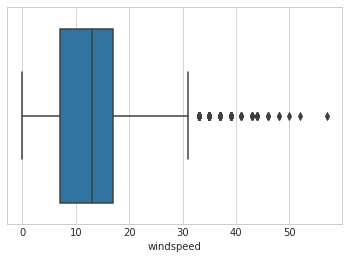

In [40]:
# Outlier Analysis 
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['windspeed'])

In [41]:
data.windspeed.value_counts()

0.00     1056
9.00      886
11.00     853
7.00      827
13.00     824
15.00     764
6.00      682
17.00     656
19.00     549
20.00     393
22.00     298
24.00     220
26.00     190
28.00     156
30.00      97
31.00      75
33.00      70
35.00      45
39.00      22
37.00      19
44.00       7
43.00       6
41.00       5
46.00       3
48.00       2
50.00       1
57.00       1
52.00       1
Name: windspeed, dtype: int64

In [42]:
# Median value
median_windspeed = data['windspeed'].quantile(0.50)
median_windspeed

12.998

In [43]:
upper_lim_wind = data['windspeed'].quantile(0.95)
upper_lim_wind

27.9993

In [44]:
data['windspeed'] = np.where(data['windspeed'] > upper_lim_wind,median_windspeed, data['windspeed'])
data.describe()

,holiday,workingday,humidity,windspeed,total number of bookings,temp_median
count,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00
mean,0.03,0.68,61.65,12.01,193.01,20.34
std,0.17,0.47,19.20,6.96,181.55,10.42
min,0.00,0.00,0.00,0.00,1.00,0.82
25%,0.00,0.00,46.00,7.00,43.00,13.94
50%,0.00,1.00,61.00,13.00,148.00,20.50
75%,0.00,1.00,77.00,17.00,286.00,26.24
max,1.00,1.00,100.00,28.00,977.00,500.03


<AxesSubplot:xlabel='windspeed'>

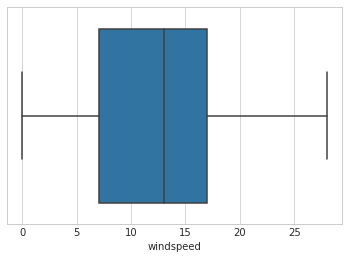

In [45]:
sns.boxplot(x=data['windspeed'])

<AxesSubplot:xlabel='temp_median'>

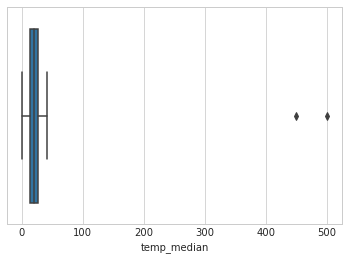

In [46]:
# Outlier Analysis 
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['temp_median'])

In [47]:
data.temp_median.value_counts()

14.76     361
26.24     355
28.70     338
27.06     331
25.42     327
13.94     324
12.30     324
22.96     319
18.86     317
16.40     315
22.14     315
24.60     307
21.32     294
13.12     291
29.52     287
17.22     274
10.66     273
20.50     273
18.04     258
30.34     240
9.84      232
15.58     208
9.02      201
31.16     190
8.20      185
27.88     178
32.80     169
23.78     162
11.48     142
19.68     129
6.56      112
33.62     103
7.38       87
31.98      81
5.74       81
34.44      63
35.26      60
4.92       48
36.90      38
4.10       36
37.72      26
36.08      16
3.28        9
0.82        7
39.36       6
38.54       6
2.46        5
1.64        2
500.03      1
41.00       1
450.00      1
Name: temp_median, dtype: int64

In [48]:
# Median value
median_temp = data['temp_median'].quantile(0.50)
median_temp

20.5

In [49]:
upper_lim_temp = data['temp_median'].quantile(0.95)
upper_lim_temp

32.8

In [50]:
data['temp_median'] = np.where(data['temp_median'] > upper_lim_wind,median_windspeed, data['temp_median'])
data.describe()

,holiday,workingday,humidity,windspeed,total number of bookings,temp_median
count,8708.00,8708.00,8708.00,8708.00,8708.00,8708.00
mean,0.03,0.68,61.65,12.01,193.01,16.84
std,0.17,0.47,19.20,6.96,181.55,5.96
min,0.00,0.00,0.00,0.00,1.00,0.82
25%,0.00,0.00,46.00,7.00,43.00,13.00
50%,0.00,1.00,61.00,13.00,148.00,15.58
75%,0.00,1.00,77.00,17.00,286.00,22.14
max,1.00,1.00,100.00,28.00,977.00,27.88


<AxesSubplot:xlabel='temp_median'>

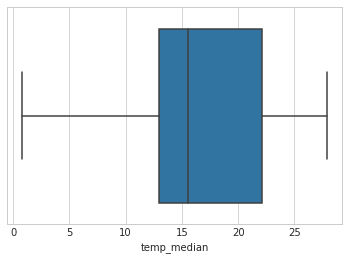

In [51]:
sns.boxplot(x=data['temp_median'])

<AxesSubplot:xlabel='total number of bookings'>

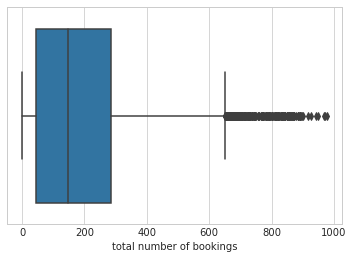

In [52]:
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['total number of bookings'])

In [53]:
data['total number of bookings'].value_counts()

5      129
4      121
3      116
6      113
2      103
      ... 
844      1
852      1
868      1
892      1
943      1
Name: total number of bookings, Length: 797, dtype: int64

<AxesSubplot:xlabel='season', ylabel='windspeed'>

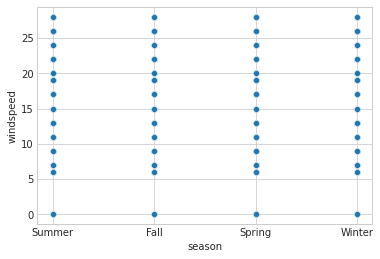

In [54]:
sns.scatterplot(x=data.season, y=data.windspeed)

<AxesSubplot:xlabel='season', ylabel='temp_median'>

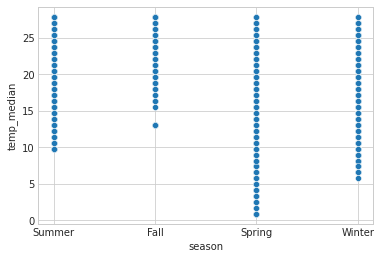

In [55]:
sns.scatterplot(x=data.season, y=data.temp_median)

In [56]:
# By visualizing the above graph, we can say that the Windspeed variation does not result as outliers.

In [57]:
data.describe(include='all')

,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median,date,time
count,8708,8708.00,8708.00,8708,8708.00,8708.00,8708.00,8708.00,8708,8708
unique,4,nan,nan,4,nan,nan,nan,nan,456,24
top,Summer,nan,nan,Clear + Few clouds,nan,nan,nan,nan,2011-08-09,10:00:00
freq,2197,nan,nan,5753,nan,nan,nan,nan,24,384
mean,NaN,0.03,0.68,NaN,61.65,12.01,193.01,16.84,NaN,NaN
std,NaN,0.17,0.47,NaN,19.20,6.96,181.55,5.96,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,0.00,1.00,0.82,NaN,NaN
25%,NaN,0.00,0.00,NaN,46.00,7.00,43.00,13.00,NaN,NaN
50%,NaN,0.00,1.00,NaN,61.00,13.00,148.00,15.58,NaN,NaN
75%,NaN,0.00,1.00,NaN,77.00,17.00,286.00,22.14,NaN,NaN


In [58]:
numeric_data = data[[ 'holiday', 'workingday', 'humidity', 'windspeed', 'total number of bookings', 'temp_median']]

<AxesSubplot:>

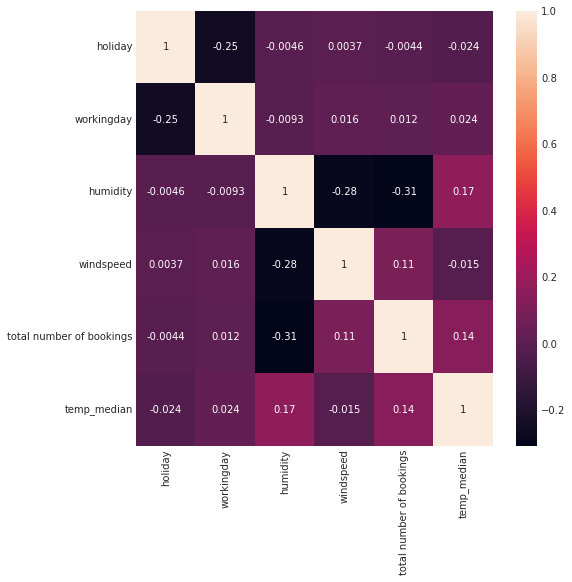

In [59]:
#Checkign Multicollinearity n the Numeric Columns (Before applying feature Engg)
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)

In [60]:
# Converting the Categories to Numerics after visualizing each column

# Applying Label Encoding

In [61]:
#Weather column
data['weather'].unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [62]:
#Using label Encoding (As there will be order asssociated)
data.loc[:, "weather"] = LabelEncoder().fit_transform(data['weather'].values)
# fit label encoder and transform values on ord_2 column
data.weather.value_counts()

0    5753
3    2276
2     678
1       1
Name: weather, dtype: int64

In [63]:
# Season column
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [64]:
#Using label Encoding (As there will be order asssociated)
data.loc[:, "season"] = LabelEncoder().fit_transform(data['season'].values)
# fit label encoder and transform values on ord_2 column
data.season.value_counts()

2    2197
0    2189
3    2186
1    2136
Name: season, dtype: int64

In [65]:
# Date column
data.date.unique()
#Using label Encoding (As there will be order asssociated)
data.loc[:, "date"] = LabelEncoder().fit_transform(data['date'].values)
# fit label encoder and transform values on ord_2 column
data.date.value_counts()

141    24
437    23
140    23
314    23
258    23
       ..
163    15
152    15
248    14
10     14
17      9
Name: date, Length: 456, dtype: int64

In [66]:
# Time of Day column
data.time.unique()
#Using label Encoding (As there will be order asssociated)
data.loc[:, "time"] = LabelEncoder().fit_transform(data['time'].values)
# fit label encoder and transform values on ord_2 column
data.time.value_counts()

10    384
9     381
13    377
23    373
16    371
15    371
12    370
19    368
18    366
6     365
17    365
11    362
21    361
22    361
5     360
2     360
7     359
20    358
3     353
14    353
1     353
0     350
8     346
4     341
Name: time, dtype: int64

In [67]:
data.head()

,season,holiday,workingday,weather,humidity,windspeed,total number of bookings,temp_median,date,time
0,2,0,1,0,77,17.00,504,22.14,305,19
1,0,0,1,0,79,19.00,5,13.00,384,4
2,1,0,1,0,50,22.00,139,5.74,12,9
3,3,0,1,0,29,9.00,209,13.94,207,16
4,0,0,1,0,51,19.00,184,13.00,164,13


In [68]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'humidity', 'windspeed',
       'total number of bookings', 'temp_median', 'date', 'time'],
      dtype='object')

In [69]:
#Rearranging columns
data = data[[ 'date', 'time',  'holiday', 'workingday', 'season', 'weather', 'temp_median', 'humidity', 'windspeed', 'total number of bookings']]
data.head()

,date,time,holiday,workingday,season,weather,temp_median,humidity,windspeed,total number of bookings
0,305,19,0,1,2,0,22.14,77,17.00,504
1,384,4,0,1,0,0,13.00,79,19.00,5
2,12,9,0,1,1,0,5.74,50,22.00,139
3,207,16,0,1,3,0,13.94,29,9.00,209
4,164,13,0,1,0,0,13.00,51,19.00,184


In [70]:
# Visualizing Patterns over the Dataset

<AxesSubplot:xlabel='season', ylabel='count'>

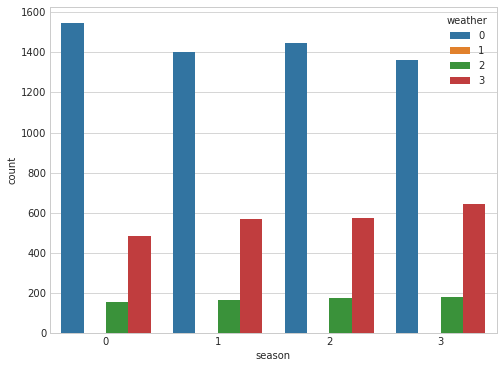

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='season',data=data,hue='weather')

<AxesSubplot:xlabel='season', ylabel='count'>

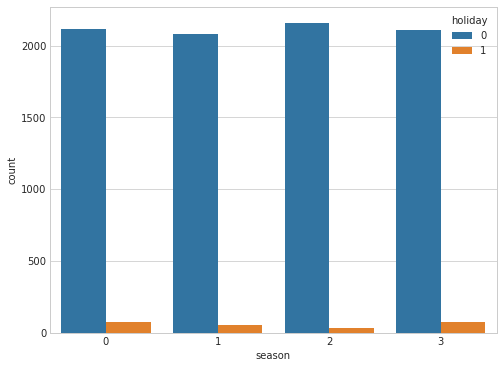

In [72]:
#Visualizing trends over the holidays
plt.figure(figsize=(8,6))
sns.countplot(x='season',data=data,hue='holiday')

<AxesSubplot:>

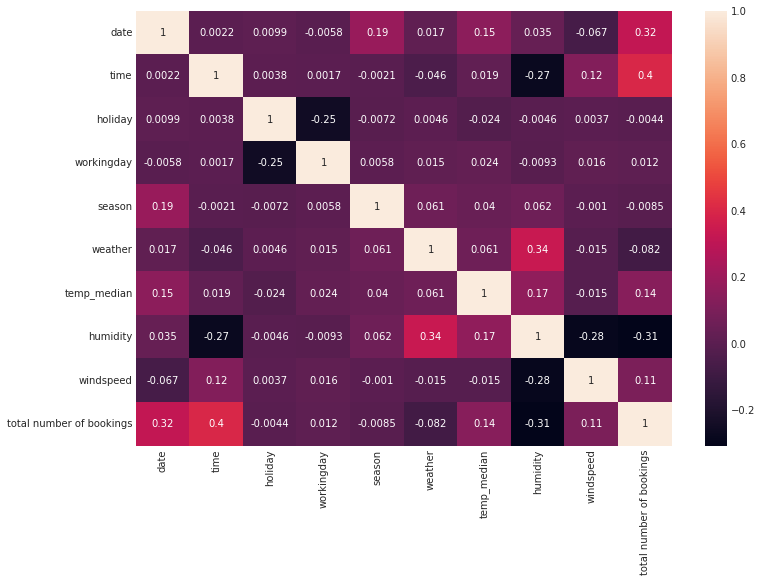

In [73]:
#Checking Multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

No evidence of Multicollinearity on the Dataset

# Task 2 : Machine learning model 

Applying Predictive Modelling

In [74]:
#Importing lazyPredict library for quick estimation of Generating the model
from lazypredict.Supervised import LazyRegressor

In [75]:
data.columns

Index(['date', 'time', 'holiday', 'workingday', 'season', 'weather',
       'temp_median', 'humidity', 'windspeed', 'total number of bookings'],
      dtype='object')

In [76]:
# Defining features and target
data_X = data.loc[:, data.columns !=  'total number of bookings']
data_y = data['total number of bookings']
data_X.head()

,date,time,holiday,workingday,season,weather,temp_median,humidity,windspeed
0,305,19,0,1,2,0,22.14,77,17.00
1,384,4,0,1,0,0,13.00,79,19.00
2,12,9,0,1,1,0,5.74,50,22.00
3,207,16,0,1,3,0,13.94,29,9.00
4,164,13,0,1,0,0,13.00,51,19.00


In [77]:
data_y.head()

0    504
1      5
2    139
3    209
4    184
Name: total number of bookings, dtype: int64

In [78]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)
X_train.head()

,date,time,holiday,workingday,season,weather,temp_median,humidity,windspeed
5428,350,7,0,1,0,2,27.06,83,15.00
4175,266,9,0,1,1,0,18.86,77,17.00
7051,232,19,0,1,1,0,13.94,34,6.00
8678,410,15,0,1,3,0,21.32,42,13.00
1633,409,3,0,1,3,0,17.22,47,20.00


In [79]:
y_train.head()

5428    230
4175    286
7051    265
8678    455
1633      3
Name: total number of bookings, dtype: int64

In [ ]:
### fitting data in LazyRegressor because here we are solving Regression use case. 
reg_before_scaling= LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
### Fitting data inLazyRegressor
models_before_scaling, predictions_before_scaling = reg_before_scaling.fit(X_train, X_test, y_train, y_test)
### Printing the Report of the models generated
print(models_before_scaling)

 24%|██▍       | 10/42 [00:04<00:19,  1.65it/s]

Output of above code:
                                    Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.94       0.94  42.22   
LGBMRegressor                                0.94       0.94  43.10   
HistGradientBoostingRegressor                0.94       0.94  43.62   
ExtraTreesRegressor                          0.93       0.93  45.10   
RandomForestRegressor                        0.92       0.92  48.21   
BaggingRegressor                             0.92       0.92  50.22   
GradientBoostingRegressor                    0.87       0.87  63.58   
DecisionTreeRegressor                        0.86       0.86  64.71   
ExtraTreeRegressor                           0.83       0.83  72.27   
KNeighborsRegressor                          0.63       0.63 106.16   
AdaBoostRegressor                            0.59       0.60 111.16   
MLPRegressor                                 0.54       0.54 118.02   
ElasticNetCV                                 0.30       0.31 145.52   
LassoLarsIC                                  0.30       0.31 145.53   
Lasso                                        0.30       0.31 145.54   
BayesianRidge                                0.30       0.31 145.65   
LassoCV                                      0.30       0.31 145.65   
OrthogonalMatchingPursuitCV                  0.30       0.31 145.65   
RidgeCV                                      0.30       0.31 145.65   
Ridge                                        0.30       0.31 145.66   
LarsCV                                       0.30       0.31 145.66   
Lars                                         0.30       0.31 145.66   
LinearRegression                             0.30       0.31 145.66   
TransformedTargetRegressor                   0.30       0.31 145.66   
LassoLarsCV                                  0.30       0.31 145.66   
SGDRegressor                                 0.30       0.31 145.74   
PoissonRegressor                             0.29       0.30 146.56   
NuSVR                                        0.28       0.29 147.68   
ElasticNet                                   0.28       0.29 147.79   
HuberRegressor                               0.28       0.28 147.99   
SVR                                          0.27       0.27 149.45   
LinearSVR                                    0.26       0.26 150.59   
TweedieRegressor                             0.25       0.25 151.39   
GeneralizedLinearRegressor                   0.25       0.25 151.39   
GammaRegressor                               0.25       0.25 151.46   
PassiveAggressiveRegressor                   0.23       0.23 153.57   
OrthogonalMatchingPursuit                    0.13       0.14 162.63   
RANSACRegressor                              0.09       0.10 166.30   
DummyRegressor                              -0.01      -0.00 175.09   
LassoLars                                   -0.01      -0.00 175.09   
KernelRidge                                 -0.91      -0.90 240.96   
GaussianProcessRegressor                   -13.90     -13.82 673.46   

                               Time Taken  
Model                                      
XGBRegressor                         4.70  
LGBMRegressor                        1.30  
HistGradientBoostingRegressor      256.30  
ExtraTreesRegressor                  2.01  
RandomForestRegressor                2.70  
BaggingRegressor                     0.36  
GradientBoostingRegressor            0.70  
DecisionTreeRegressor                0.21  
ExtraTreeRegressor                   0.04  
KNeighborsRegressor                  1.71  
AdaBoostRegressor                    0.31  
MLPRegressor                       192.97  
ElasticNetCV                         1.19  
LassoLarsIC                          0.20  
Lasso                                0.21  
BayesianRidge                        0.31  
LassoCV                              1.01  
OrthogonalMatchingPursuitCV          0.42  
RidgeCV                              0.28  
Ridge                                0.02  
LarsCV                               0.40  
Lars                                 0.20  
LinearRegression                     0.10  
TransformedTargetRegressor           0.06  
LassoLarsCV                          0.30  
SGDRegressor                         0.22  
PoissonRegressor                     0.39  
NuSVR                                3.56  
ElasticNet                           0.24  
HuberRegressor                       1.79  
SVR                                  4.31  
LinearSVR                            0.12  
TweedieRegressor                     0.21  
GeneralizedLinearRegressor           0.21  
GammaRegressor                       0.34  
PassiveAggressiveRegressor           0.21  
OrthogonalMatchingPursuit            0.02  
RANSACRegressor                      1.90  
DummyRegressor                       0.02  
LassoLars                            0.11  
KernelRidge                         24.31  
GaussianProcessRegressor            36.10

df_models_before_scaling = pd.DataFrame(models_before_scaling)
df_models_before_scaling.columns = 'BeforeScaling_' + df_models_before_scaling.columns.values
df_models_before_scaling.head()

In [81]:
# Applying Feature Scaling - Using MixmaxScaler function
scaler = preprocessing.MinMaxScaler()
 #Creating new dataframe with the scaled values of each columns  - This will help the non-tree based algorithm's to predict better
data_X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
data_X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [82]:
data_X_train_scaled.head()

,date,time,holiday,workingday,season,weather,temp_median,humidity,windspeed
0,0.77,0.30,0.00,1.00,0.00,0.67,0.97,0.83,0.54
1,0.58,0.39,0.00,1.00,0.33,0.00,0.67,0.77,0.61
2,0.51,0.83,0.00,1.00,0.33,0.00,0.48,0.34,0.21
3,0.90,0.65,0.00,1.00,1.00,0.00,0.76,0.42,0.46
4,0.90,0.13,0.00,1.00,1.00,0.00,0.61,0.47,0.71


In [83]:
data_X_test_scaled.head()

,date,time,holiday,workingday,season,weather,temp_median,humidity,windspeed
0,0.15,0.43,0.00,1.00,0.67,1.00,0.82,0.83,0.71
1,0.44,0.78,0.00,1.00,1.00,1.00,0.52,0.81,0.39
2,0.02,0.74,0.00,1.00,0.33,0.00,0.27,0.40,0.25
3,0.51,0.61,0.00,1.00,0.33,0.00,0.48,0.39,0.68
4,0.89,0.43,0.00,1.00,1.00,0.00,0.97,0.54,0.00


In [84]:
### Applying LazyRegressor for a Regression use case - After feature Scaling
reg_after_scaling = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
### Fitting data in LazyRegressor
models_after_scaling, predictions_after_scaling = reg_after_scaling.fit(data_X_train_scaled, data_X_test_scaled, y_train, y_test)
### Printing the Report of the models generated
print(models_after_scaling)

100%|██████████| 42/42 [03:39<00:00,  5.24s/it]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.94       0.94  42.22   
LGBMRegressor                                0.94       0.94  43.10   
HistGradientBoostingRegressor                0.94       0.94  43.62   
ExtraTreesRegressor                          0.93       0.93  45.10   
RandomForestRegressor                        0.92       0.92  48.21   
BaggingRegressor                             0.92       0.92  50.22   
GradientBoostingRegressor                    0.87       0.87  63.58   
DecisionTreeRegressor                        0.86       0.86  64.71   
ExtraTreeRegressor                           0.83       0.83  72.27   
KNeighborsRegressor                          0.63       0.63 106.16   
AdaBoostRegressor                            0.59       0.60 111.16   
MLPRegressor                                 0.54       0.54 118.02   
Elasti

In [86]:
df_models_after_scaling = pd.DataFrame(models_after_scaling)
df_models_after_scaling.columns = 'AfterScaling_' + df_models_after_scaling.columns.values
df_models_after_scaling

,AfterScaling_AfterScaling_Adjusted R-Squared,AfterScaling_AfterScaling_R-Squared,AfterScaling_AfterScaling_RMSE,AfterScaling_AfterScaling_Time Taken
Model,,,,
XGBRegressor,0.94,0.94,42.22,2.19
LGBMRegressor,0.94,0.94,43.10,2.29
HistGradientBoostingRegressor,0.94,0.94,43.62,5.01
ExtraTreesRegressor,0.93,0.93,45.10,2.09
RandomForestRegressor,0.92,0.92,48.21,2.62
BaggingRegressor,0.92,0.92,50.22,0.30
GradientBoostingRegressor,0.87,0.87,63.58,0.80
DecisionTreeRegressor,0.86,0.86,64.71,0.23
ExtraTreeRegressor,0.83,0.83,72.27,0.04


# Output:

	AfterScaling_AfterScaling_Adjusted R-Squared	AfterScaling_AfterScaling_R-Squared	AfterScaling_AfterScaling_RMSE	AfterScaling_AfterScaling_Time Taken
Model				
XGBRegressor	0.94	0.94	42.22	2.19
LGBMRegressor	0.94	0.94	43.10	2.29
HistGradientBoostingRegressor	0.94	0.94	43.62	5.01
ExtraTreesRegressor	0.93	0.93	45.10	2.09
RandomForestRegressor	0.92	0.92	48.21	2.62
BaggingRegressor	0.92	0.92	50.22	0.30
GradientBoostingRegressor	0.87	0.87	63.58	0.80
DecisionTreeRegressor	0.86	0.86	64.71	0.23
ExtraTreeRegressor	0.83	0.83	72.27	0.04
KNeighborsRegressor	0.63	0.63	106.16	1.21
AdaBoostRegressor	0.59	0.60	111.16	0.27
MLPRegressor	0.54	0.54	118.02	140.30
ElasticNetCV	0.30	0.31	145.52	1.30
LassoLarsIC	0.30	0.31	145.53	0.20
Lasso	0.30	0.31	145.54	0.30
BayesianRidge	0.30	0.31	145.65	0.23
LassoCV	0.30	0.31	145.65	1.10
OrthogonalMatchingPursuitCV	0.30	0.31	145.65	0.60
RidgeCV	0.30	0.31	145.65	0.21
Ridge	0.30	0.31	145.66	0.06
LarsCV	0.30	0.31	145.66	0.49
Lars	0.30	0.31	145.66	0.11
LinearRegression	0.30	0.31	145.66	0.20
TransformedTargetRegressor	0.30	0.31	145.66	0.02
LassoLarsCV	0.30	0.31	145.66	0.49
SGDRegressor	0.30	0.31	145.74	0.15
PoissonRegressor	0.29	0.30	146.56	0.59
NuSVR	0.28	0.29	147.68	3.48
ElasticNet	0.28	0.29	147.79	0.14
HuberRegressor	0.28	0.28	147.99	1.80
SVR	0.27	0.27	149.45	4.33
LinearSVR	0.26	0.26	150.59	0.20
TweedieRegressor	0.25	0.25	151.39	0.30
GeneralizedLinearRegressor	0.25	0.25	151.39	0.29
GammaRegressor	0.25	0.25	151.46	0.37
PassiveAggressiveRegressor	0.23	0.23	153.57	0.20
OrthogonalMatchingPursuit	0.13	0.14	162.63	0.03
RANSACRegressor	0.09	0.10	166.30	2.61
DummyRegressor	-0.01	-0.00	175.09	0.02
LassoLars	-0.01	-0.00	175.09	0.11
KernelRidge	-0.91	-0.90	240.96	16.80
GaussianProcessRegressor	-13.90	-13.82	673.46	25.21

In [ ]:
#Note: Unable to merge both data because the kernal is getting dead during computation.

#df_lazy_models = pd.merge(df_models_before_scaling, df_models_after_scaling, how='left')
#df_lazy_models.head()

# Conclusions:
    1. XGBoostRegressor and RandomForestRegressor performs better on the given dataset.
    
# Future Operations:
    1. Imbalanced dataset can be treated/optimized.
    2. Random grids can be utilized effectively. In this analysis, reduced the parameters grid due to less computation time.